In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import bitstring
import matplotlib as mpl

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Bitstream Vera Sans",
#    "font.sans-serif": "Helvetica",
})

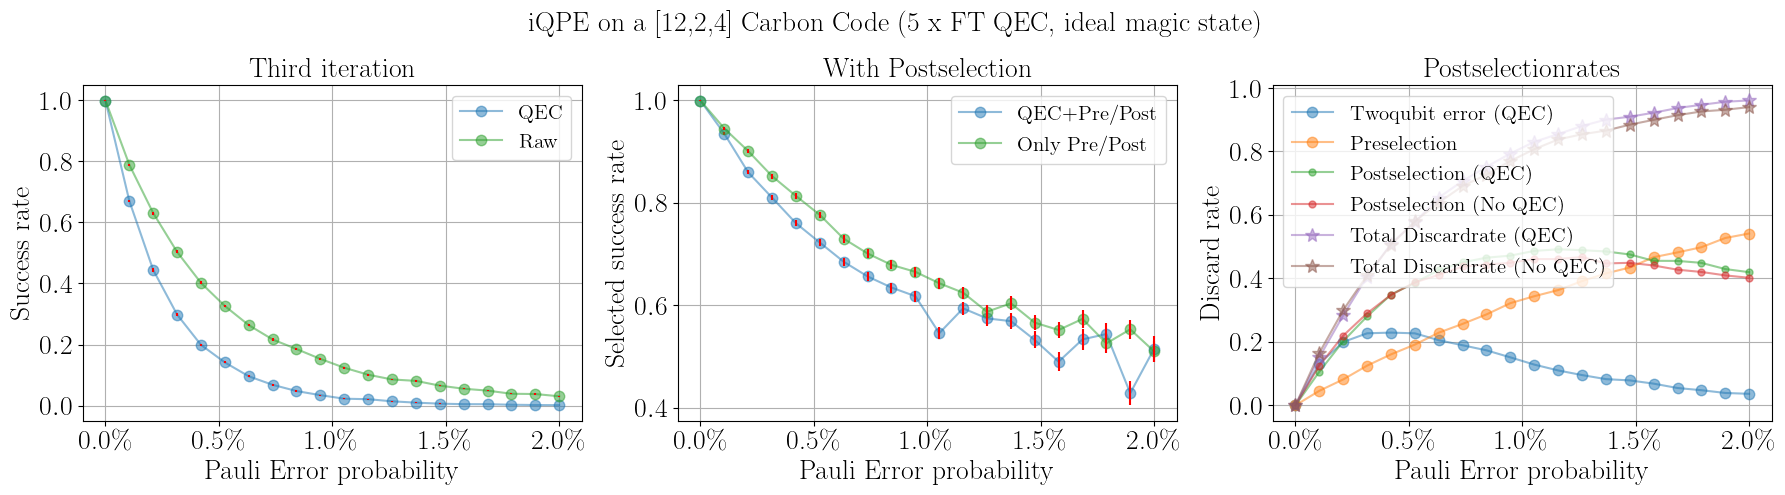

In [3]:
x,pre,post,nn,ne,en,ee,pre2,two,post2,nn2,ne2,en2,ee2 = np.loadtxt("text/FTCarbon_3rd_a.txt", delimiter = ",")       #qec_ideal auf beiden qubits zusätzlich nach dem encoding im vgl. zu b)

fig, (ax1,ax2,ax4) = plt.subplots(figsize=(18,5),nrows=1,ncols=3)
ax1.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 1))
ax2.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 1))
#ax3.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 1))
ax4.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 1))

y_PS = []
y_no_QEC_PS = []
for i in range(len(x)):
    y_no_QEC_PS.append((ne[i]+nn[i])/(ne[i]+nn[i]+ee[i]+en[i]))
    y_PS.append((ne2[i]+nn2[i])/(ne2[i]+nn2[i]+ee2[i]+en2[i]))

y = [sum(i) for i in zip(ne,nn)]
y_qec = [sum(i) for i in zip(ne2,nn2)]

err1 = [np.sqrt((i-i**2)/10000) for i in y_qec]
err2 = [np.sqrt((i-i**2)/10000) for i in y]

err3, err4 = [], []
for i in y_PS:
    err3.append(np.sqrt((i-i**2)/(10000*(1-post2[y_PS.index(i)]-pre2[y_PS.index(i)]))))
for i in y_no_QEC_PS:
    err4.append(np.sqrt((i-i**2)/(10000*(1-post[y_no_QEC_PS.index(i)]-pre[y_no_QEC_PS.index(i)]))))


ax1.plot(x,y_qec, label="QEC", marker = ".",markersize = 15, alpha = 0.5)
ax1.errorbar(x, y_qec, yerr=err1, ecolor="red", linestyle="")
ax1.plot(x,y, label="Raw", marker = ".",markersize = 15, alpha = 0.5)
ax1.errorbar(x, y, yerr=err2, ecolor="red", linestyle="")

ax2.plot(x,y_PS, label="QEC+Pre/Post", marker = ".",markersize = 15,  alpha = 0.5)
ax2.errorbar(x, y_PS, yerr=err3, ecolor="red", linestyle="")
ax2.plot(x,y_no_QEC_PS, label="Only Pre/Post", marker = ".",markersize = 15, alpha = 0.5)
ax2.errorbar(x, y_no_QEC_PS, yerr=err4, ecolor="red", linestyle="")

ax4.plot(x, two , label="Twoqubit error (QEC)", marker = ".",markersize = 15, alpha = 0.5)
ax4.plot(x, pre2, label="Preselection", marker = ".",markersize = 15, alpha = 0.5)
ax4.plot(x, post2, label="Postselection (QEC)", marker = ".",markersize = 10, alpha = 0.5)
ax4.plot(x, post, label="Postselection (No QEC)", marker = ".",markersize = 10, alpha = 0.5)

ax4.plot(x, post2+pre2, label="Total Discardrate (QEC)", marker = "*",markersize = 10, alpha = 0.5)
ax4.plot(x, post+pre, label="Total Discardrate (No QEC)", marker = "*",markersize = 10, alpha = 0.5)

#ax1.set_title("1st iteration of iQPE on the [12, 2, 4] Carbon Code", fontsize=20)
ax1.set_title("Third iteration", fontsize=20)
ax2.set_title("With Postselection", fontsize=20)
#ax3.set_title("Layerwise improvement", fontsize=20)
ax4.set_title("Postselectionrates", fontsize=20)
ax1.set_xlabel("Pauli Error probability", fontsize=20)
ax2.set_xlabel("Pauli Error probability", fontsize=20)
#ax3.set_xlabel("Pauli Error probability", fontsize=20)
ax4.set_xlabel("Pauli Error probability", fontsize=20)
ax1.set_ylabel("Success rate", fontsize=20)
ax2.set_ylabel("Selected success rate", fontsize=20)
#ax3.set_ylabel("Success rate", fontsize=20)
ax4.set_ylabel("Discard rate", fontsize=20)
ax1.tick_params(axis='both', which='major', labelsize=20)
ax2.tick_params(axis='both', which='major', labelsize=20)
#ax3.tick_params(axis='both', which='major', labelsize=20)
ax4.tick_params(axis='both', which='major', labelsize=20)
ax1.grid(), ax2.grid(), ax4.grid()
ax1.legend(fontsize=15)
ax2.legend(fontsize=15)
#ax3.legend(fontsize=15)
ax4.legend(fontsize=15)
fig.suptitle('iQPE on a [12,2,4] Carbon Code (5 x FT QEC, ideal magic state)', fontsize=20)
plt.tight_layout()
plt.savefig("Figures/FTCarbon1.png", dpi = 200)
plt.show()

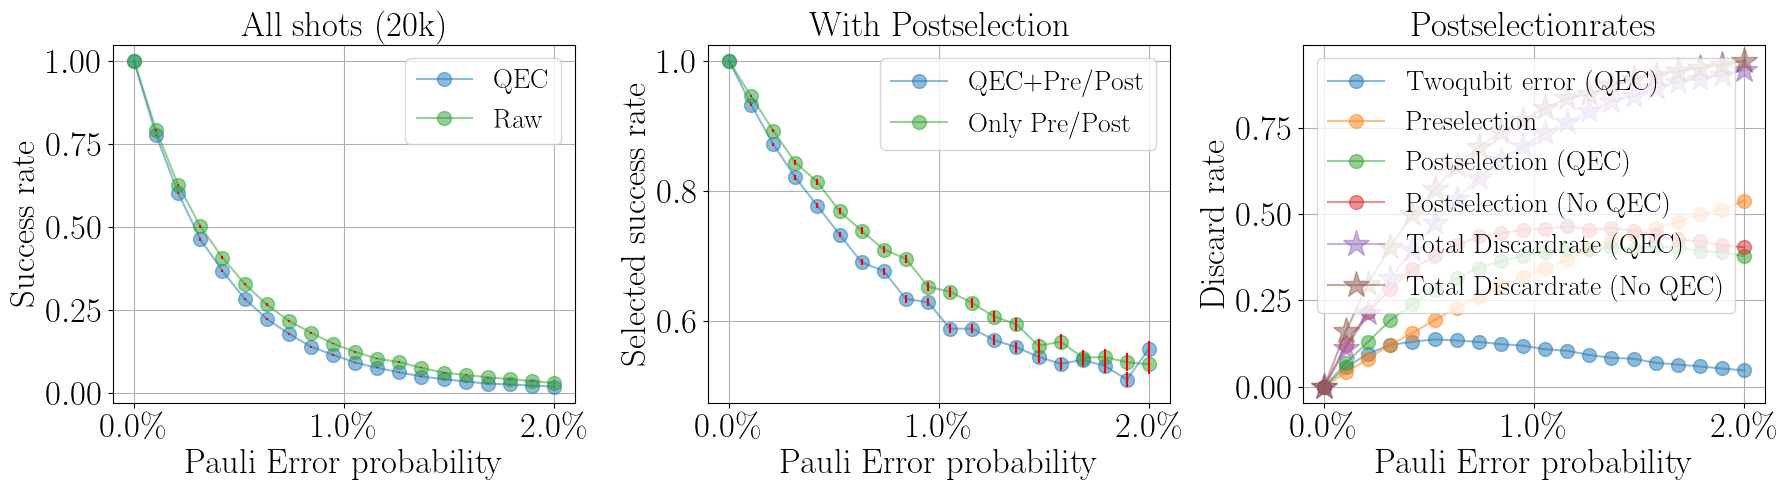

In [4]:
x,pre,post,nn,ne,en,ee,pre2,two,post2,nn2,ne2,en2,ee2 = np.loadtxt("text/FTCarbon_3rd_b.txt", delimiter = ",")       #

fig, (ax1,ax2,ax4) = plt.subplots(figsize=(18,5),nrows=1,ncols=3)
ax1.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 1))
ax2.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 1))
#ax3.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 1))
ax4.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 1))

y_PS = []
y_no_QEC_PS = []
for i in range(len(x)):
    y_no_QEC_PS.append((ne[i]+nn[i])/(ne[i]+nn[i]+ee[i]+en[i]))
    y_PS.append((ne2[i]+nn2[i])/(ne2[i]+nn2[i]+ee2[i]+en2[i]))

y = [sum(i) for i in zip(ne,nn)]
y_qec = [sum(i) for i in zip(ne2,nn2)]

err1 = [np.sqrt((i-i**2)/20000) for i in y_qec]
err2 = [np.sqrt((i-i**2)/20000) for i in y]

err3, err4 = [], []
for i in y_PS:
    err3.append(np.sqrt((i-i**2)/(20000*(1-post2[y_PS.index(i)]-pre2[y_PS.index(i)]))))
for i in y_no_QEC_PS:
    err4.append(np.sqrt((i-i**2)/(20000*(1-post[y_no_QEC_PS.index(i)]-pre[y_no_QEC_PS.index(i)]))))


ax1.plot(x,y_qec, label="QEC", marker = ".",markersize = 20, alpha = 0.5)
ax1.errorbar(x, y_qec, yerr=err1, ecolor="red", linestyle="")
ax1.plot(x,y, label="Raw", marker = ".",markersize = 20, alpha = 0.5)
ax1.errorbar(x, y, yerr=err2, ecolor="red", linestyle="")

ax2.plot(x,y_PS, label="QEC+Pre/Post", marker = ".",markersize = 20,  alpha = 0.5)
ax2.errorbar(x, y_PS, yerr=err3, ecolor="red", linestyle="")
ax2.plot(x,y_no_QEC_PS, label="Only Pre/Post", marker = ".",markersize = 20, alpha = 0.5)
ax2.errorbar(x, y_no_QEC_PS, yerr=err4, ecolor="red", linestyle="")

ax4.plot(x, two , label="Twoqubit error (QEC)", marker = ".",markersize = 20, alpha = 0.5)
ax4.plot(x, pre2, label="Preselection", marker = ".",markersize = 20, alpha = 0.5)
ax4.plot(x, post2, label="Postselection (QEC)", marker = ".",markersize = 20, alpha = 0.5)
ax4.plot(x, post, label="Postselection (No QEC)", marker = ".",markersize = 20, alpha = 0.5)

ax4.plot(x, post2+pre2, label="Total Discardrate (QEC)", marker = "*",markersize = 20, alpha = 0.5)
ax4.plot(x, post+pre, label="Total Discardrate (No QEC)", marker = "*",markersize = 20, alpha = 0.5)

#ax1.set_title("1st iteration of iQPE on the [12, 2, 4] Carbon Code", fontsize=20)
ax1.set_title("All shots (20k)", fontsize=25)
ax2.set_title("With Postselection", fontsize=25)
#ax3.set_title("Layerwise improvement", fontsize=20)
ax4.set_title("Postselectionrates", fontsize=25)
ax1.set_xlabel("Pauli Error probability", fontsize=25)
ax2.set_xlabel("Pauli Error probability", fontsize=25)
#ax3.set_xlabel("Pauli Error probability", fontsize=20)
ax4.set_xlabel("Pauli Error probability", fontsize=25)
ax1.set_ylabel("Success rate", fontsize=25)
ax2.set_ylabel("Selected success rate", fontsize=25)
#ax3.set_ylabel("Success rate", fontsize=20)
ax4.set_ylabel("Discard rate", fontsize=25)
ax1.tick_params(axis='both', which='major', labelsize=25)
ax2.tick_params(axis='both', which='major', labelsize=25)
#ax3.tick_params(axis='both', which='major', labelsize=20)
ax4.tick_params(axis='both', which='major', labelsize=25)
ax1.grid(), ax2.grid(), ax4.grid()
ax1.legend(fontsize=20)
ax2.legend(fontsize=20)
#ax3.legend(fontsize=15)
ax4.legend(fontsize=20)
#fig.suptitle('iQPE on a [12,2,4] Carbon Code (2 x FT QEC, ideal magic state)', fontsize=20)
plt.tight_layout()
plt.savefig("Figures/FTCarbon2.png", dpi = 200)
plt.show()

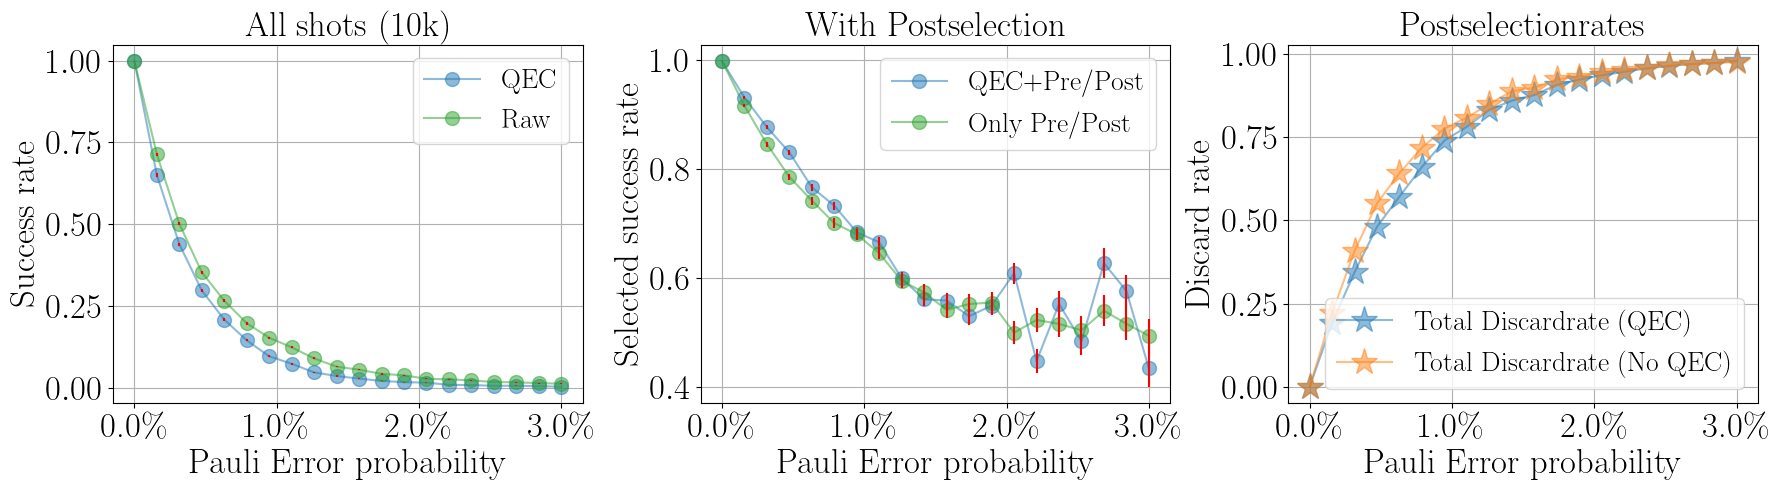

In [11]:
x,pre,post,nn,ne,en,ee,pre2,two,post2,nn2,ne2,en2,ee2 = np.loadtxt("text/FTCarbon_3rd_c.txt", delimiter = ",")       #nur einmal qec

fig, (ax1,ax2,ax4) = plt.subplots(figsize=(18,5),nrows=1,ncols=3)
ax1.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 1))
ax2.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 1))
#ax3.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 1))
ax4.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 1))

y_PS = []
y_no_QEC_PS = []
for i in range(len(x)):
    y_no_QEC_PS.append((ne[i]+nn[i])/(ne[i]+nn[i]+ee[i]+en[i]))
    y_PS.append((ne2[i]+nn2[i])/(ne2[i]+nn2[i]+ee2[i]+en2[i]))

y = [sum(i) for i in zip(ne,nn)]
y_qec = [sum(i) for i in zip(ne2,nn2)]

err1 = [np.sqrt((i-i**2)/10000) for i in y_qec]
err2 = [np.sqrt((i-i**2)/10000) for i in y]

err3, err4 = [], []
for i in y_PS:
    err3.append(np.sqrt((i-i**2)/(10000*(1-post2[y_PS.index(i)]-pre2[y_PS.index(i)]))))
for i in y_no_QEC_PS:
    err4.append(np.sqrt((i-i**2)/(10000*(1-post[y_no_QEC_PS.index(i)]-pre[y_no_QEC_PS.index(i)]))))


ax1.plot(x,y_qec, label="QEC", marker = ".",markersize = 20, alpha = 0.5)
ax1.errorbar(x, y_qec, yerr=err1, ecolor="red", linestyle="")
ax1.plot(x,y, label="Raw", marker = ".",markersize = 20, alpha = 0.5)
ax1.errorbar(x, y, yerr=err2, ecolor="red", linestyle="")

ax2.plot(x,y_PS, label="QEC+Pre/Post", marker = ".",markersize = 20,  alpha = 0.5)
ax2.errorbar(x, y_PS, yerr=err3, ecolor="red", linestyle="")
ax2.plot(x,y_no_QEC_PS, label="Only Pre/Post", marker = ".",markersize = 20, alpha = 0.5)
ax2.errorbar(x, y_no_QEC_PS, yerr=err4, ecolor="red", linestyle="")

#ax4.plot(x, two , label="Twoqubit error (QEC)", marker = ".",markersize = 20, alpha = 0.5)
#ax4.plot(x, pre2, label="Preselection", marker = ".",markersize = 20, alpha = 0.5)
#ax4.plot(x, post2, label="Postselection (QEC)", marker = ".",markersize = 20, alpha = 0.5)
#ax4.plot(x, post, label="Postselection (No QEC)", marker = ".",markersize = 20, alpha = 0.5)

ax4.plot(x, post2+pre2, label="Total Discardrate (QEC)", marker = "*",markersize = 20, alpha = 0.5)
ax4.plot(x, post+pre, label="Total Discardrate (No QEC)", marker = "*",markersize = 20, alpha = 0.5)

#ax1.set_title("1st iteration of iQPE on the [12, 2, 4] Carbon Code", fontsize=20)
ax1.set_title("All shots (10k)", fontsize=25)
ax2.set_title("With Postselection", fontsize=25)
#ax3.set_title("Layerwise improvement", fontsize=20)
ax4.set_title("Postselectionrates", fontsize=25)
ax1.set_xlabel("Pauli Error probability", fontsize=25)
ax2.set_xlabel("Pauli Error probability", fontsize=25)
#ax3.set_xlabel("Pauli Error probability", fontsize=20)
ax4.set_xlabel("Pauli Error probability", fontsize=25)
ax1.set_ylabel("Success rate", fontsize=25)
ax2.set_ylabel("Selected success rate", fontsize=25)
#ax3.set_ylabel("Success rate", fontsize=20)
ax4.set_ylabel("Discard rate", fontsize=25)
ax1.tick_params(axis='both', which='major', labelsize=25)
ax2.tick_params(axis='both', which='major', labelsize=25)
#ax3.tick_params(axis='both', which='major', labelsize=20)
ax4.tick_params(axis='both', which='major', labelsize=25)
ax1.grid(), ax2.grid(), ax4.grid()
ax1.legend(fontsize=20)
ax2.legend(fontsize=20)
#ax3.legend(fontsize=15)
ax4.legend(fontsize=20)
#fig.suptitle('iQPE on a [12,2,4] Carbon Code (1 x FT QEC, ideal magic state)', fontsize=20)
plt.tight_layout()
plt.savefig("Figures/FTCarbon3.png", dpi = 200)
plt.show()

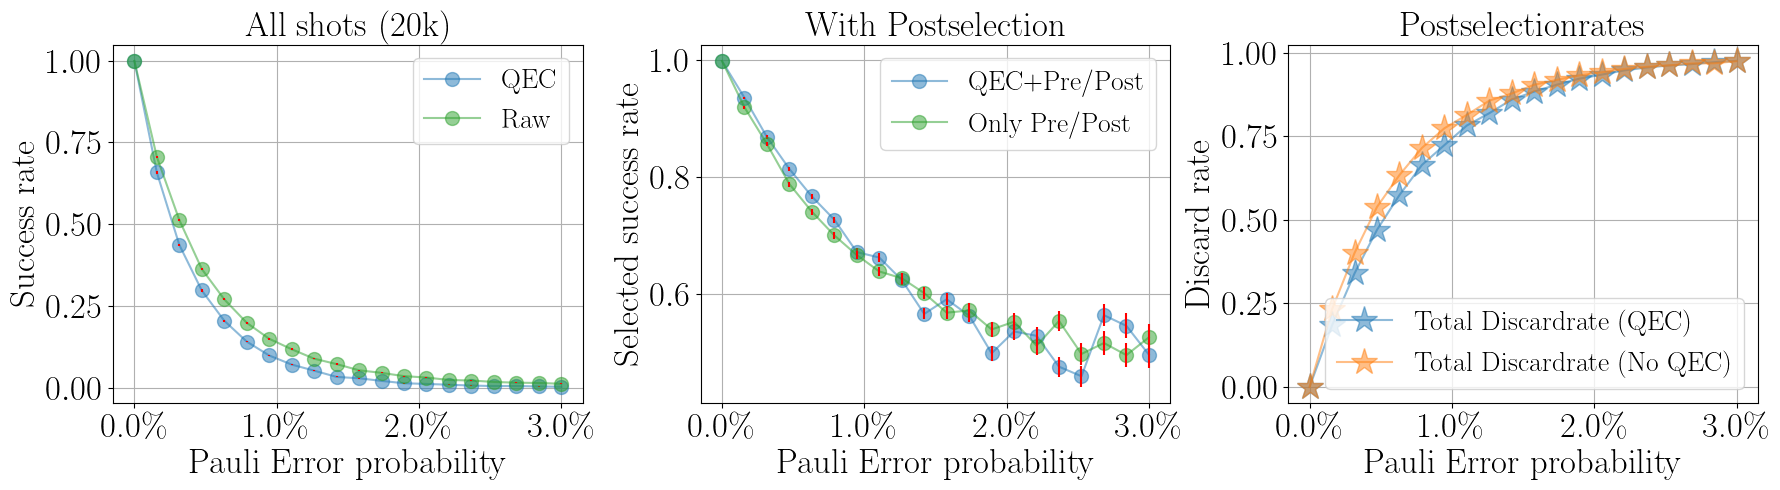

In [12]:
x,pre,post,nn,ne,en,ee,pre2,two,post2,nn2,ne2,en2,ee2 = np.loadtxt("text/FTCarbon_3rd_d.txt", delimiter = ",")       #nur einmal qec

fig, (ax1,ax2,ax4) = plt.subplots(figsize=(18,5),nrows=1,ncols=3)
ax1.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 1))
ax2.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 1))
#ax3.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 1))
ax4.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 1))

y_PS = []
y_no_QEC_PS = []
for i in range(len(x)):
    y_no_QEC_PS.append((ne[i]+nn[i])/(ne[i]+nn[i]+ee[i]+en[i]))
    y_PS.append((ne2[i]+nn2[i])/(ne2[i]+nn2[i]+ee2[i]+en2[i]))

y = [sum(i) for i in zip(ne,nn)]
y_qec = [sum(i) for i in zip(ne2,nn2)]

err1 = [np.sqrt((i-i**2)/20000) for i in y_qec]
err2 = [np.sqrt((i-i**2)/20000) for i in y]

err3, err4 = [], []
for i in y_PS:
    err3.append(np.sqrt((i-i**2)/(20000*(1-post2[y_PS.index(i)]-pre2[y_PS.index(i)]))))
for i in y_no_QEC_PS:
    err4.append(np.sqrt((i-i**2)/(20000*(1-post[y_no_QEC_PS.index(i)]-pre[y_no_QEC_PS.index(i)]))))


ax1.plot(x,y_qec, label="QEC", marker = ".",markersize = 20, alpha = 0.5)
ax1.errorbar(x, y_qec, yerr=err1, ecolor="red", linestyle="")
ax1.plot(x,y, label="Raw", marker = ".",markersize = 20, alpha = 0.5)
ax1.errorbar(x, y, yerr=err2, ecolor="red", linestyle="")

ax2.plot(x,y_PS, label="QEC+Pre/Post", marker = ".",markersize = 20,  alpha = 0.5)
ax2.errorbar(x, y_PS, yerr=err3, ecolor="red", linestyle="")
ax2.plot(x,y_no_QEC_PS, label="Only Pre/Post", marker = ".",markersize = 20, alpha = 0.5)
ax2.errorbar(x, y_no_QEC_PS, yerr=err4, ecolor="red", linestyle="")

#ax4.plot(x, two , label="Twoqubit error (QEC)", marker = ".",markersize = 20, alpha = 0.5)
#ax4.plot(x, pre2, label="Preselection", marker = ".",markersize = 20, alpha = 0.5)
#ax4.plot(x, post2, label="Postselection (QEC)", marker = ".",markersize = 20, alpha = 0.5)
#ax4.plot(x, post, label="Postselection (No QEC)", marker = ".",markersize = 20, alpha = 0.5)

ax4.plot(x, post2+pre2, label="Total Discardrate (QEC)", marker = "*",markersize = 20, alpha = 0.5)
ax4.plot(x, post+pre, label="Total Discardrate (No QEC)", marker = "*",markersize = 20, alpha = 0.5)

#ax1.set_title("1st iteration of iQPE on the [12, 2, 4] Carbon Code", fontsize=20)
ax1.set_title("All shots (20k)", fontsize=25)
ax2.set_title("With Postselection", fontsize=25)
#ax3.set_title("Layerwise improvement", fontsize=20)
ax4.set_title("Postselectionrates", fontsize=25)
ax1.set_xlabel("Pauli Error probability", fontsize=25)
ax2.set_xlabel("Pauli Error probability", fontsize=25)
#ax3.set_xlabel("Pauli Error probability", fontsize=20)
ax4.set_xlabel("Pauli Error probability", fontsize=25)
ax1.set_ylabel("Success rate", fontsize=25)
ax2.set_ylabel("Selected success rate", fontsize=25)
#ax3.set_ylabel("Success rate", fontsize=20)
ax4.set_ylabel("Discard rate", fontsize=25)
ax1.tick_params(axis='both', which='major', labelsize=25)
ax2.tick_params(axis='both', which='major', labelsize=25)
#ax3.tick_params(axis='both', which='major', labelsize=20)
ax4.tick_params(axis='both', which='major', labelsize=25)
ax1.grid(), ax2.grid(), ax4.grid()
ax1.legend(fontsize=20)
ax2.legend(fontsize=20)
#ax3.legend(fontsize=15)
ax4.legend(fontsize=20)
#fig.suptitle('iQPE on a [12,2,4] Carbon Code (1 x FT QEC, ideal magic state)', fontsize=20)
plt.tight_layout()
plt.savefig("Figures/FTCarbon4.png", dpi = 200)
plt.show()

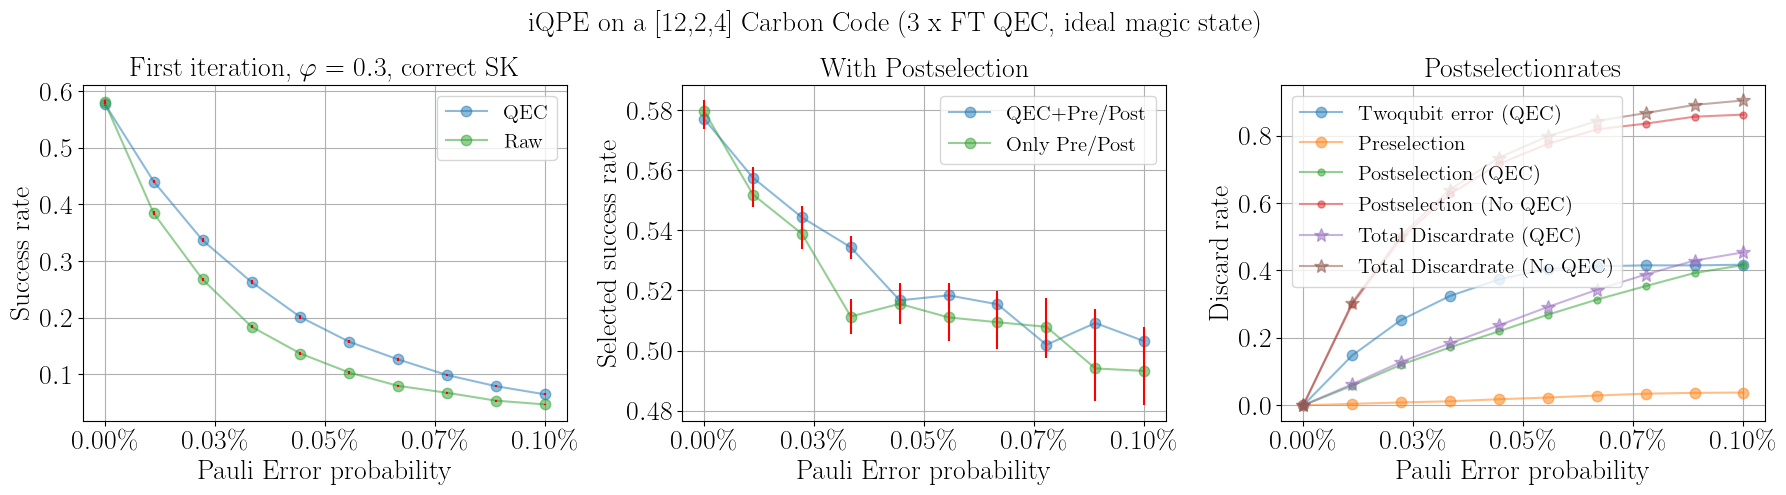

In [7]:
x,pre,post,nn,ne,en,ee,pre2,two,post2,nn2,ne2,en2,ee2 = np.loadtxt("text/FTCarbon_e.txt", delimiter = ",")       #dreimal qec innerhalb von CU, ab hier korrekte SK Zerlegung

fig, (ax1,ax2,ax4) = plt.subplots(figsize=(18,5),nrows=1,ncols=3)
ax1.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 2))
ax2.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 2))
#ax3.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 1))
ax4.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 2))

y_PS = []
y_no_QEC_PS = []
for i in range(len(x)):
    y_no_QEC_PS.append((ne[i]+nn[i])/(ne[i]+nn[i]+ee[i]+en[i]))
    y_PS.append((ne2[i]+nn2[i])/(ne2[i]+nn2[i]+ee2[i]+en2[i]))

y = [sum(i) for i in zip(ne,nn)]
y_qec = [sum(i) for i in zip(ne2,nn2)]

err1 = [np.sqrt((i-i**2)/20000) for i in y_qec]
err2 = [np.sqrt((i-i**2)/20000) for i in y]

err3, err4 = [], []
for i in y_PS:
    err3.append(np.sqrt((i-i**2)/(20000*(1-post2[y_PS.index(i)]-pre2[y_PS.index(i)]))))
for i in y_no_QEC_PS:
    err4.append(np.sqrt((i-i**2)/(20000*(1-post[y_no_QEC_PS.index(i)]-pre[y_no_QEC_PS.index(i)]))))


ax1.plot(x,y_qec, label="QEC", marker = ".",markersize = 15, alpha = 0.5)
ax1.errorbar(x, y_qec, yerr=err1, ecolor="red", linestyle="")
ax1.plot(x,y, label="Raw", marker = ".",markersize = 15, alpha = 0.5)
ax1.errorbar(x, y, yerr=err2, ecolor="red", linestyle="")

ax2.plot(x,y_PS, label="QEC+Pre/Post", marker = ".",markersize = 15,  alpha = 0.5)
ax2.errorbar(x, y_PS, yerr=err3, ecolor="red", linestyle="")
ax2.plot(x,y_no_QEC_PS, label="Only Pre/Post", marker = ".",markersize = 15, alpha = 0.5)
ax2.errorbar(x, y_no_QEC_PS, yerr=err4, ecolor="red", linestyle="")

ax4.plot(x, two , label="Twoqubit error (QEC)", marker = ".",markersize = 15, alpha = 0.5)
ax4.plot(x, pre2, label="Preselection", marker = ".",markersize = 15, alpha = 0.5)
ax4.plot(x, post2, label="Postselection (QEC)", marker = ".",markersize = 10, alpha = 0.5)
ax4.plot(x, post, label="Postselection (No QEC)", marker = ".",markersize = 10, alpha = 0.5)

ax4.plot(x, post2+pre2, label="Total Discardrate (QEC)", marker = "*",markersize = 10, alpha = 0.5)
ax4.plot(x, post+pre, label="Total Discardrate (No QEC)", marker = "*",markersize = 10, alpha = 0.5)

#ax1.set_title("1st iteration of iQPE on the [12, 2, 4] Carbon Code", fontsize=20)
ax1.set_title(r"First iteration, $\varphi = 0.3$, correct SK", fontsize=20)
ax2.set_title("With Postselection", fontsize=20)
#ax3.set_title("Layerwise improvement", fontsize=20)
ax4.set_title("Postselectionrates", fontsize=20)
ax1.set_xlabel("Pauli Error probability", fontsize=20)
ax2.set_xlabel("Pauli Error probability", fontsize=20)
#ax3.set_xlabel("Pauli Error probability", fontsize=20)
ax4.set_xlabel("Pauli Error probability", fontsize=20)
ax1.set_ylabel("Success rate", fontsize=20)
ax2.set_ylabel("Selected success rate", fontsize=20)
#ax3.set_ylabel("Success rate", fontsize=20)
ax4.set_ylabel("Discard rate", fontsize=20)
ax1.tick_params(axis='both', which='major', labelsize=20)
ax2.tick_params(axis='both', which='major', labelsize=20)
#ax3.tick_params(axis='both', which='major', labelsize=20)
ax4.tick_params(axis='both', which='major', labelsize=20)
ax1.grid(), ax2.grid(), ax4.grid()
ax1.legend(fontsize=15)
ax2.legend(fontsize=15)
#ax3.legend(fontsize=15)
ax4.legend(fontsize=15)
fig.suptitle('iQPE on a [12,2,4] Carbon Code (3 x FT QEC, ideal magic state)', fontsize=20)
plt.tight_layout()
plt.savefig("Figures/FTCarbon7.png", dpi = 200)
plt.show()

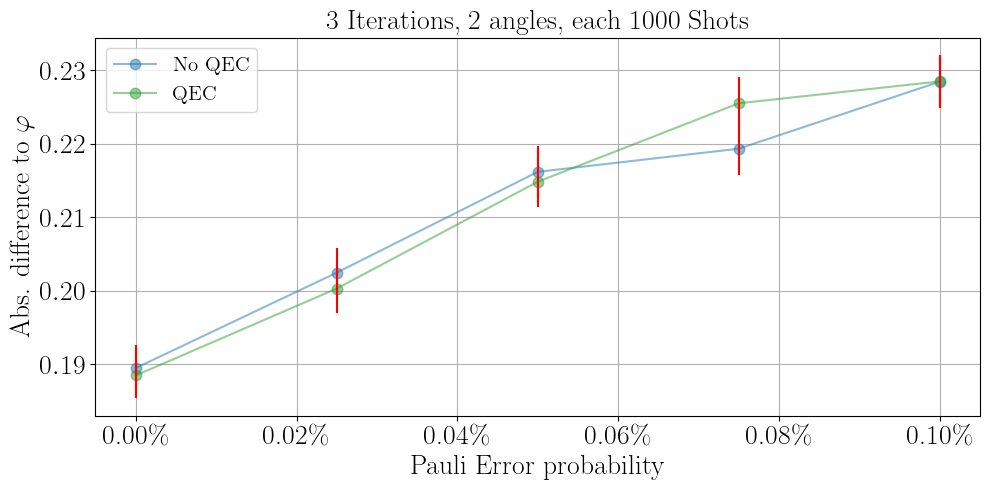

In [8]:
x, y, y_qec, err, err_qec = np.loadtxt("text/CarbFinal_e.txt", delimiter = ",")       #dreimal qec innerhalb von CU, besser approx. von 0.3, guut

fig, ax1 = plt.subplots(figsize=(10,5))
ax1.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 2))

err = [i/((100)**0.5) for i in err]
err_qec = [i/((100)**0.5)for i in err_qec]


ax1.plot(x,y, label="No QEC", marker = ".",markersize = 15, alpha = 0.5)
ax1.errorbar(x, y, yerr=err, ecolor="red", linestyle="")

ax1.plot(x,y_qec, label="QEC", marker = ".",markersize = 15, alpha = 0.5)
ax1.errorbar(x, y_qec, yerr=err_qec, ecolor="red", linestyle="")

ax1.set_title("3 Iterations, 2 angles, each 1000 Shots", fontsize=20)

ax1.set_xlabel("Pauli Error probability", fontsize=20)

ax1.set_ylabel(r"Abs. difference to $\varphi$", fontsize=20)

ax1.tick_params(axis='both', which='major', labelsize=20)

ax1.grid()
ax1.legend(fontsize=15)

#fig.suptitle('Three iterations iQPE on a [12,2,4] Carbon Code', fontsize=20)
plt.tight_layout()
plt.savefig("Figures/CarbFinal5.png", dpi = 200)
plt.show()

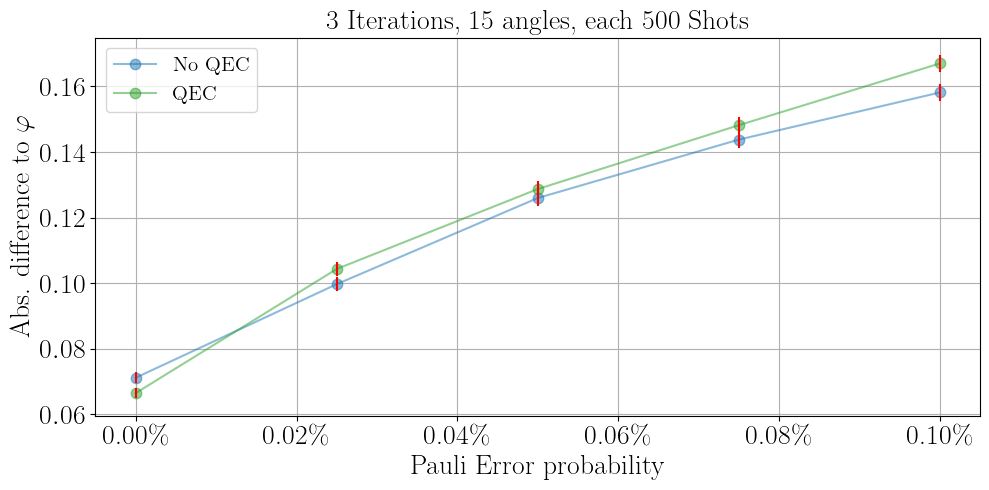

In [9]:
x, y, y_qec, err, err_qec = np.loadtxt("text/CarbFinal_g.txt", delimiter = ",")       #jetzt funktioniert der Code endlich!!!

fig, ax1 = plt.subplots(figsize=(10,5))
ax1.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 2))

err = [i/((100)**0.5) for i in err]
err_qec = [i/((100)**0.5)for i in err_qec]


ax1.plot(x,y, label="No QEC", marker = ".",markersize = 15, alpha = 0.5)
ax1.errorbar(x, y, yerr=err, ecolor="red", linestyle="")

ax1.plot(x,y_qec, label="QEC", marker = ".",markersize = 15, alpha = 0.5)
ax1.errorbar(x, y_qec, yerr=err_qec, ecolor="red", linestyle="")

ax1.set_title("3 Iterations, 15 angles, each 500 Shots", fontsize=20)

ax1.set_xlabel("Pauli Error probability", fontsize=20)

ax1.set_ylabel(r"Abs. difference to $\varphi$", fontsize=20)

ax1.tick_params(axis='both', which='major', labelsize=20)

ax1.grid()
ax1.legend(fontsize=15)

#fig.suptitle('Three iterations iQPE on a [12,2,4] Carbon Code', fontsize=20)
plt.tight_layout()
plt.savefig("Figures/CarbFinal6.png", dpi = 200)
plt.show()

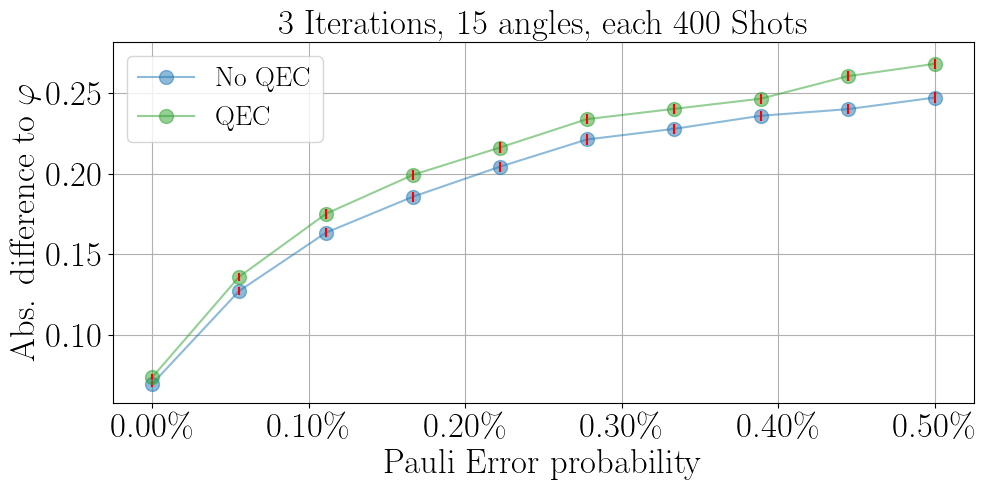

In [14]:
x, y, y_qec, err, err_qec = np.loadtxt("text/CarbFinal_h.txt", delimiter = ",")       #so wie g, bloß größerer Errorbereich

fig, ax1 = plt.subplots(figsize=(10,5))
ax1.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 2))

err = [i/((200)**0.5) for i in err]
err_qec = [i/((200)**0.5)for i in err_qec]


ax1.plot(x,y, label="No QEC", marker = ".",markersize = 20, alpha = 0.5)
ax1.errorbar(x, y, yerr=err, ecolor="red", linestyle="")

ax1.plot(x,y_qec, label="QEC", marker = ".",markersize = 20, alpha = 0.5)
ax1.errorbar(x, y_qec, yerr=err_qec, ecolor="red", linestyle="")

ax1.set_title("3 Iterations, 15 angles, each 400 Shots", fontsize=25)

ax1.set_xlabel("Pauli Error probability", fontsize=25)

ax1.set_ylabel(r"Abs. difference to $\varphi$", fontsize=25)

ax1.tick_params(axis='both', which='major', labelsize=25)

ax1.grid()
ax1.legend(fontsize=20)

#fig.suptitle('Three iterations iQPE on a [12,2,4] Carbon Code', fontsize=20)
plt.tight_layout()
plt.savefig("Figures/CarbFinal7.png", dpi = 200)
plt.show()